<h1>Dataset Regresion logistica</h1>

## 1. análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [66]:

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



In [67]:
#Cargamos dataset

df = pd.read_csv("heart_cleveland_upload.csv")

In [68]:
# Realizamos lectura de los Datos para el análisis exploratorio, con las primeras 10 columnas

df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [69]:
# Descripción de los datos
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [102]:
#identificamos datos nulos o faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        274 non-null    int64  
 1   sex        274 non-null    int64  
 2   cp         274 non-null    int64  
 3   trestbps   274 non-null    int64  
 4   chol       274 non-null    int64  
 5   fbs        274 non-null    int64  
 6   restecg    274 non-null    int64  
 7   thalach    274 non-null    int64  
 8   exang      274 non-null    int64  
 9   oldpeak    274 non-null    float64
 10  slope      274 non-null    int64  
 11  ca         274 non-null    int64  
 12  thal       274 non-null    int64  
 13  condition  274 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.1 KB


In [71]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

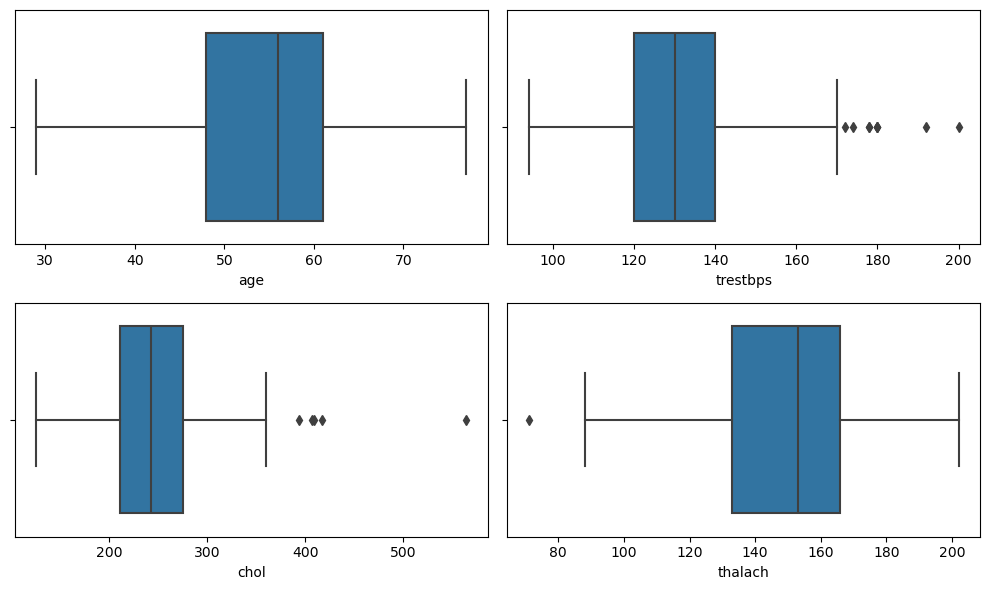

In [72]:
#Identificación de Datos Atípicos mediante graficas

numeric_features = ['age', 'trestbps', 'chol', 'thalach']

plt.figure(figsize=(10, 6))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=feature, data=df)

plt.tight_layout()
plt.show()

In [ ]:
###Correlacion de datos

In [73]:
correlation_matrix = df.corr()
print(correlation_matrix)

                age       sex        cp  trestbps      chol       fbs  \
age        1.000000 -0.092399  0.110471  0.290476  0.202644  0.132062   
sex       -0.092399  1.000000  0.008908 -0.066340 -0.198089  0.038850   
cp         0.110471  0.008908  1.000000 -0.036980  0.072088 -0.057663   
trestbps   0.290476 -0.066340 -0.036980  1.000000  0.131536  0.180860   
chol       0.202644 -0.198089  0.072088  0.131536  1.000000  0.012708   
fbs        0.132062  0.038850 -0.057663  0.180860  0.012708  1.000000   
restecg    0.149917  0.033897  0.063905  0.149242  0.165046  0.068831   
thalach   -0.394563 -0.060496 -0.339308 -0.049108 -0.000075 -0.007842   
exang      0.096489  0.143581  0.377525  0.066691  0.059339 -0.000893   
oldpeak    0.197123  0.106567  0.203244  0.191243  0.038596  0.008311   
slope      0.159405  0.033345  0.151079  0.121172 -0.009215  0.047819   
ca         0.362210  0.091925  0.235644  0.097954  0.115945  0.152086   
thal       0.120795  0.370556  0.266275  0.130612  

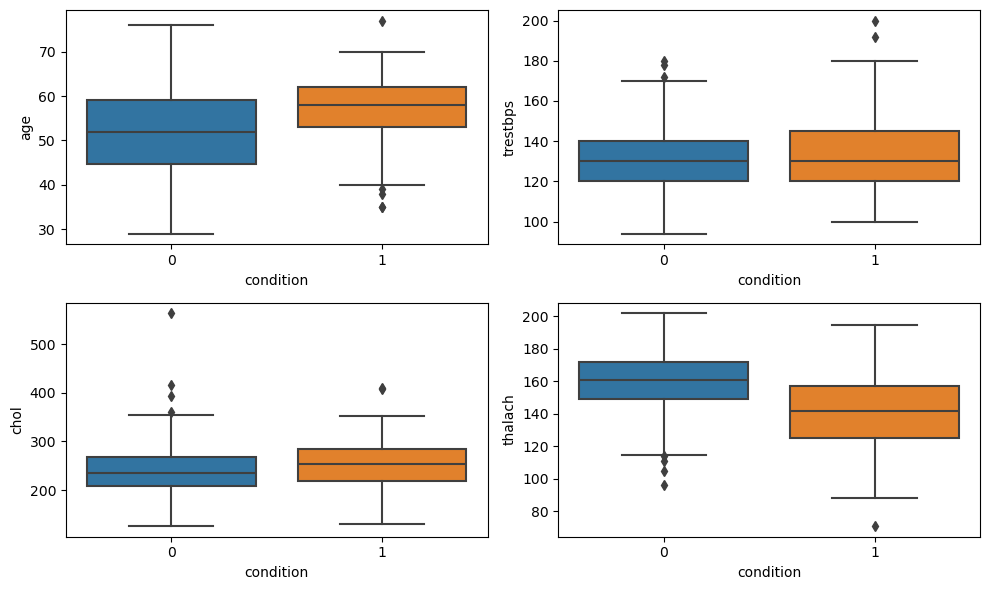

In [74]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach']

plt.figure(figsize=(10, 6))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='condition', y=feature, data=df)

plt.tight_layout()
plt.show()

## 2. Preprocesar los datos 

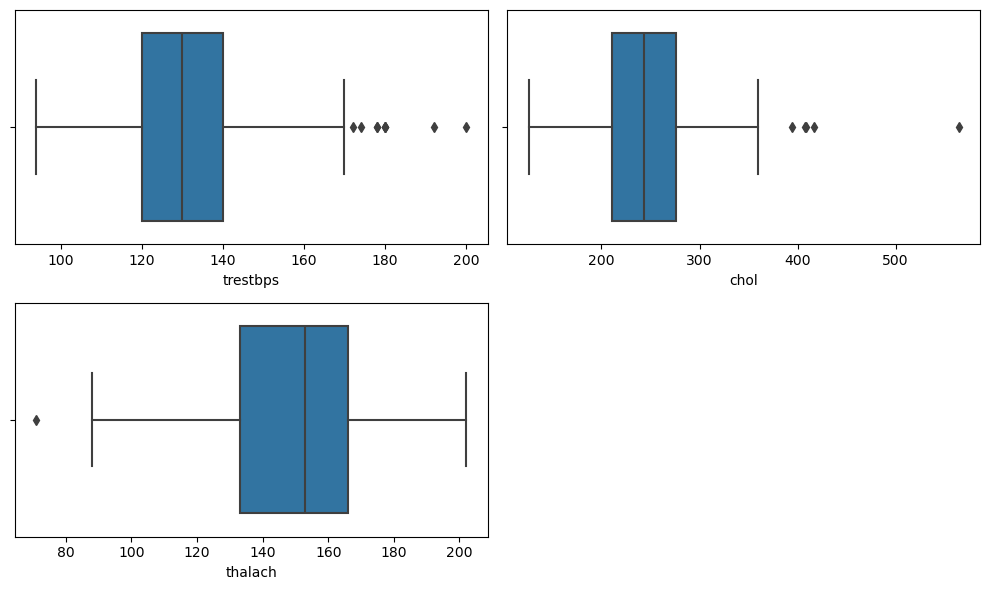

In [75]:
#Identificación de Datos Atípicos

numeric_features = ['trestbps', 'chol', 'thalach']

plt.figure(figsize=(10, 6))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=feature, data=df)

plt.tight_layout()
plt.show()

In [80]:
#Conteo de Datos Atípicos "trestbps"
nivel_min=90
nivel_maximo=170
Total_Atipicos=((df['trestbps']<nivel_minimo)|(df['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos trestbps es {}".format(Total_Atipicos))

#Conteo de Datos Atípicos "chol"
nivel_minimo=100
nivel_maximo=360
Total_Atipicos=((df['chol']<nivel_minimo)|(df['chol']>nivel_maximo)).sum()
print("El total de datos atípicos chol es {}".format(Total_Atipicos))

#Conteo de Datos Atípicos "thalach"
nivel_minimo=90
nivel_maximo=200
Total_Atipicos=((df['thalach']<nivel_minimo)|(df['thalach']>nivel_maximo)).sum()
print("El total de datos atípicos thalach es {}".format(Total_Atipicos))

El total de datos atípicos trestbps es 9
El total de datos atípicos chol es 5
El total de datos atípicos thalach es 3


In [81]:
# Filtra Datos Atípicos

df=df[(df['trestbps']<170)&(df['trestbps']>90)]

df=df[(df['chol']<360)&(df['chol']>100)]

df=df[(df['thalach']<200)&(df['thalach']>90)]


In [82]:
# Validar si se removieron los datos atípicos

nivel_min=90
nivel_maximo=170
Total_Atipicos=((df['trestbps']<nivel_minimo)|(df['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos trestbps es {}".format(Total_Atipicos))

nivel_minimo=100
nivel_maximo=360
Total_Atipicos=((df['chol']<nivel_minimo)|(df['chol']>nivel_maximo)).sum()
print("El total de datos atípicos chol es {}".format(Total_Atipicos))

nivel_minimo=90
nivel_maximo=200
Total_Atipicos=((df['thalach']<nivel_minimo)|(df['thalach']>nivel_maximo)).sum()
print("El total de datos atípicos thalach es {}".format(Total_Atipicos))

El total de datos atípicos trestbps es 0
El total de datos atípicos chol es 0
El total de datos atípicos thalach es 0


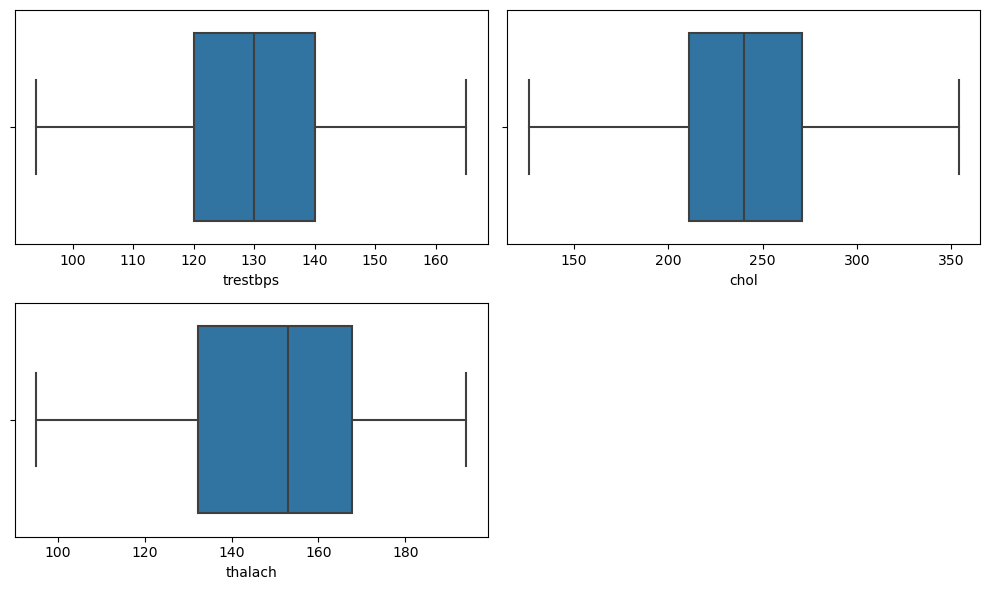

In [84]:
###Grafica para comprobar si se filtro correctamente
numeric_features = ['trestbps', 'chol', 'thalach']

plt.figure(figsize=(10, 6))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=feature, data=df)

plt.tight_layout()
plt.show()

In [83]:
#Revisión del tipo de datos y datos faltantes (no hay)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        274 non-null    int64  
 1   sex        274 non-null    int64  
 2   cp         274 non-null    int64  
 3   trestbps   274 non-null    int64  
 4   chol       274 non-null    int64  
 5   fbs        274 non-null    int64  
 6   restecg    274 non-null    int64  
 7   thalach    274 non-null    int64  
 8   exang      274 non-null    int64  
 9   oldpeak    274 non-null    float64
 10  slope      274 non-null    int64  
 11  ca         274 non-null    int64  
 12  thal       274 non-null    int64  
 13  condition  274 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.1 KB


## 3. Características más relevantes para entrenar el modelo 

Característica de interes:
- Condition: si la persona tiene una enfermedad cardiaca o no (0 = no tiene efermedad - 1 = si tiene enfermedad)
- Predecir si una persona posee una enfermedad cardiaca

In [85]:
# Total de personas con enfermedades cardiacas

df['condition'].value_counts()

condition
0    151
1    123
Name: count, dtype: int64

In [86]:
df[['condition']].head(10)

,condition
0,0
1,0
2,0
3,1
4,0
6,0
7,1
8,0
11,1
12,1


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [89]:
X = df.drop('condition',axis=1) 
Y = df['condition'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state= 0)


In [90]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
215   58    0   3       100   248    0        2      122      0      1.0   
6     63    1   0       145   233    1        2      150      0      2.3   
281   44    1   3       110   197    0        2      177      0      0.0   
87    64    1   2       140   335    0        0      158      0      0.0   
139   44    1   2       130   233    0        0      179      1      0.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
86    64    1   2       125   309    0        0      131      1      1.8   
8     60    0   0       150   240    0        0      171      0      0.9   
22    34    1   0       118   182    0        2      174      0      0.0   
50    49    0   1       134   271    0        0      162      0      0.0   
177   64    1   3       128   263    0        0      105      1      0.2   

     slope  ca  thal  
215      1   0     0  
6        2   0     1  
281      0   1    

In [91]:
print (Y_train)

215    0
6      0
281    1
87     1
139    0
      ..
86     1
8      0
22     0
50     0
177    0
Name: condition, Length: 219, dtype: int64


## 5. Entrenar el modelo

In [93]:
# modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") 
modelo_regresion.fit (X_train , Y_train)   

Prediccion = modelo_regresion.predict(X_test) 


In [94]:
print (Y_test)

252    1
106    1
107    0
273    1
91     1
30     0
37     0
261    0
228    1
118    0
203    1
207    0
114    0
126    1
104    0
169    0
276    0
74     1
18     1
198    1
283    1
112    0
123    0
250    1
165    0
233    0
193    1
187    1
239    1
41     0
82     0
220    1
214    1
272    0
124    0
46     0
80     1
57     0
99     0
65     0
67     0
133    1
140    0
204    1
116    0
144    0
271    0
96     1
54     0
103    1
285    0
16     0
222    1
296    1
34     1
Name: condition, dtype: int64


In [95]:
print (Prediccion)

[1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0]


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [96]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.84      0.84      0.84        25

    accuracy                           0.85        55
   macro avg       0.85      0.85      0.85        55
weighted avg       0.85      0.85      0.85        55



## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

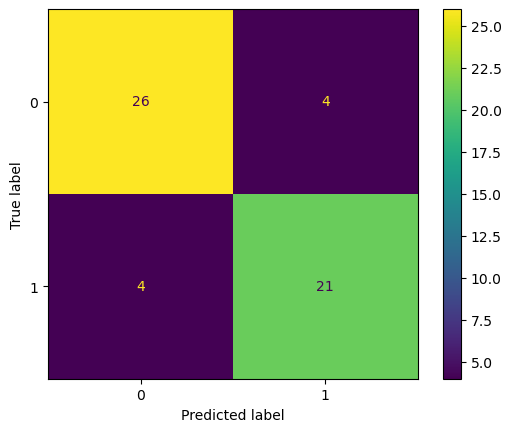

In [100]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

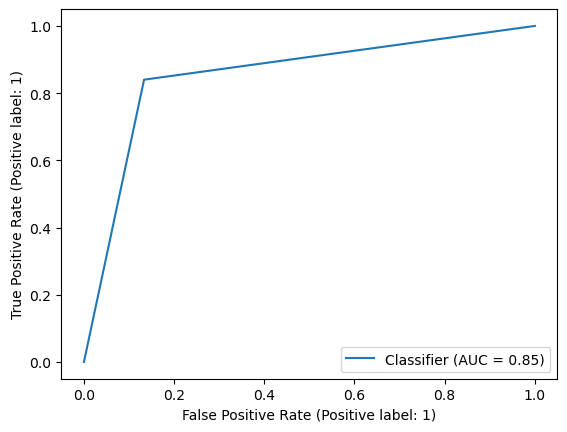

In [101]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos